In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# MLP для классификации нелинейно разделимых данных

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, shuffle=True, random_state=2004)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

In [3]:
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

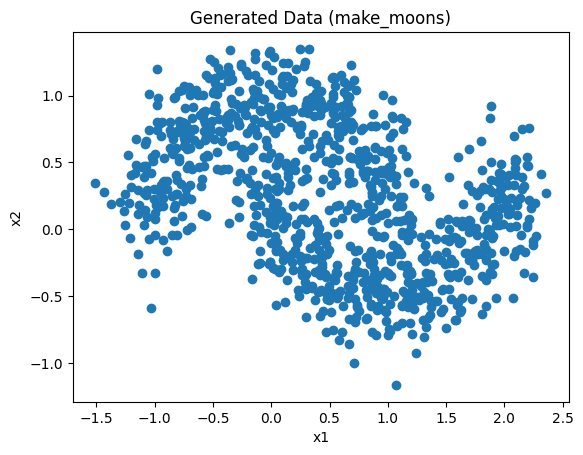

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.title("Generated Data (make_moons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2004
)

In [6]:
X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

In [7]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [8]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.12)

In [9]:
losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

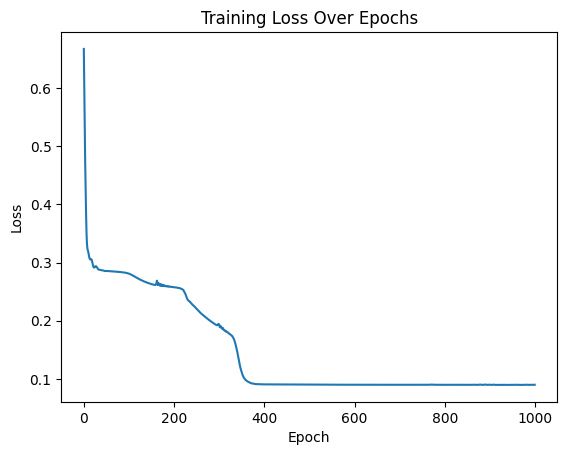

In [10]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [11]:
with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_labels = (y_pred_test >= 0.5).float()
    accuracy = (y_pred_labels.eq(y_test_t).sum() / len(y_test_t)).item()

In [12]:
accuracy

0.9649999737739563

# MLP XOR

Круто конечно, но здесь как будто рандом, просто потому что мало данных. А может я что-то не понял или не так сделал((

In [13]:
X = torch.tensor([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])

y = torch.tensor([
    [0.],
    [1.],
    [1.],
    [0.]
])

In [14]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [15]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [16]:
losses = []

for epoch in range(300):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

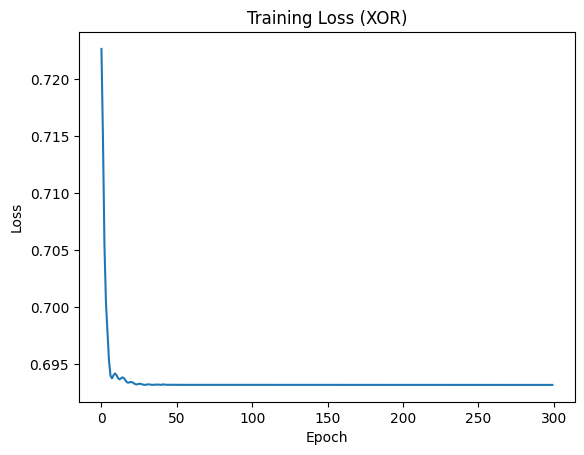

In [17]:
plt.plot(losses)
plt.title("Training Loss (XOR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [18]:
with torch.no_grad():
    preds = (model(X) > 0.5).float()
    accuracy = (preds == y).float().mean().item()

In [19]:
print("Predictions:", preds.squeeze().tolist())
print("Accuracy:", accuracy)

Predictions: [0.0, 0.0, 0.0, 1.0]
Accuracy: 0.25
